In [91]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time
from tqdm import tqdm

## Taylor Series

The Taylor series is an infinite sum of terms that represents a function as a series of its derivatives at a single point. It is named after the mathematician Brook Taylor. The series is particularly useful for approximating functions that are difficult to compute directly.

### Definition

Given a function $f(x)$ that is infinitely differentiable at a point $a$, the Taylor series of $f(x)$ around the point $a$ is given by:

$$
f(x) = f(a) + f'(a)(x-a) + \frac{f''(a)}{2!}(x-a)^2 + \frac{f'''(a)}{3!}(x-a)^3 + \cdots
$$

In general, the $n$-th term of the Taylor series is:

$$
f(x) = \sum_{n=0}^{\infty} \frac{f^{(n)}(a)}{n!}(x-a)^n
$$

where:
- $f^{(n)}(a)$ is the $n$-th derivative of $f(x)$ evaluated at $a$
- $n!$ is the factorial of $n$
- $(x-a)^n$ is the $n$-th power of $(x-a)$

### Maclaurin Series

A special case of the Taylor series is the Maclaurin series, where $a = 0$. The Maclaurin series of $f(x)$ is:

$$
f(x) = f(0) + f'(0)x + \frac{f''(0)}{2!}x^2 + \frac{f'''(0)}{3!}x^3 + \cdots
$$

Or more generally:

$$
f(x) = \sum_{n=0}^{\infty} \frac{f^{(n)}(0)}{n!}x^n
$$

### Examples

1. **Exponential Function** $e^x$:

$$
e^x = \sum_{n=0}^{\infty} \frac{x^n}{n!} = 1 + x + \frac{x^2}{2!} + \frac{x^3}{3!} + \cdots
$$

2. **Sine Function** $\sin(x)$:

$$
\sin(x) = \sum_{n=0}^{\infty} \frac{(-1)^n}{(2n+1)!}x^{2n+1} = x - \frac{x^3}{3!} + \frac{x^5}{5!} - \cdots
$$

3. **Cosine Function** $\cos(x)$:

$$
\cos(x) = \sum_{n=0}^{\infty} \frac{(-1)^n}{(2n)!}x^{2n} = 1 - \frac{x^2}{2!} + \frac{x^4}{4!} - \cdots
$$

### Convergence

The Taylor series may not always converge to the function it represents. The series converges to $f(x)$ if the remainder term $R_n(x)$ approaches zero as $n$ approaches infinity. The remainder term is given by:

$$
R_n(x) = \frac{f^{(n+1)}(c)}{(n+1)!}(x-a)^{n+1}
$$

for some $c$ between $a$ and $x$. If the remainder term goes to zero, the Taylor series converges to the function $f(x)$.


In [21]:
def exp_taylor_series(X: float, N: int, A: float) -> float:
    n = np.array(range(N+1))
    a = (X - A)**n

    factorials = []
    for number in n:
        factorials.append(math.factorial(number))
    factorials_array = np.array(factorials)

    a = a / factorials_array

    deriv = np.empty(N+1)
    deriv.fill(np.exp(A))
    return np.dot(a, deriv)

In [22]:
def cos_taylor_series(X: float, N: int, A: float) -> float:
    result = 0
    for n in range(N + 1):
        if n % 4 == 0:
            result += (math.cos(A) * (X - A)**n) / math.factorial(n)
        elif n % 4 == 1:
            result -= (math.sin(A) * (X - A)**n) / math.factorial(n)
        elif n % 4 == 2:
            result -= (math.cos(A) * (X - A)**n) / math.factorial(n)
        elif n % 4 == 3:
            result += (math.sin(A) * (X - A)**n) / math.factorial(n)
    return result

def sin_taylor_series(X: float, N: int, A: float) -> float:
    result = 0
    for n in range(N + 1):
        if n % 4 == 0:
            result += (math.sin(A) * (X - A)**n) / math.factorial(n)
        elif n % 4 == 1:
            result += (math.cos(A) * (X - A)**n) / math.factorial(n)
        elif n % 4 == 2:
            result -= (math.sin(A) * (X - A)**n) / math.factorial(n)
        elif n % 4 == 3:
            result -= (math.cos(A) * (X - A)**n) / math.factorial(n)
    return result

In [23]:
class taylor_series:
    def __init__(self) -> None:
        self.graph_params = {}
        self.params = {}
        self.xs = None
        
    def set_params(self, N = 5, A = 0):
        self.params["N"] = N
        self.params["A"] = A
        return
    
    def set_graph_params(self, size = 5000, lower_bound = -10, upper_bound = 10):
        self.graph_params = {
            "size": size,
            "lower_bound": lower_bound,
            "upper_bound": upper_bound
        }
    
    def plot_function(self, func="exponential"):
        assert func in ["exponential", "cosine", "sine"]
        
        if func == "exponential":
            taylor=exp_taylor_series
            function = np.exp
        elif func == "cosine":
            taylor = cos_taylor_series
            function = np.cos
        elif func == "sine":
            taylor = sin_taylor_series
            function = np.sin
            
        if not self.graph_params:
            self.set_graph_params()
        
        size = self.graph_params["size"]
        lower_bound = self.graph_params["lower_bound"]
        upper_bound = self.graph_params["upper_bound"]
        
        if self.xs is None:
            self.xs = np.sort(np.random.uniform(low=lower_bound, high=upper_bound, size=size))
            
        y = function(self.xs)
        
        taylor_ys = [taylor(x, **self.params) for x in self.xs]
        
        plt.figure(figsize=(10, 6))
        plt.plot(self.xs, y, label='Function', marker='o')
        plt.plot(self.xs, taylor_ys, label='Taylor Approximation', marker='o', color='red')
        plt.title("Plot of the Function and its Taylor Series Approximation")
        plt.xlim(lower_bound *1.1, upper_bound *  1.1)
        plt.ylim(np.min(y) - abs(0.1 *np.max(y)), np.max(y) * 1.1)
        plt.text(x = lower_bound, y = np.max(y)*2/3, s = f"Order = {self.params['N']}")
        plt.text(x = lower_bound, y = np.max(y)*3/4, s = f"Function = {func}")
        plt.legend()
        plt.show()
        
    def visualize_plots(self, N=10, A = 0, func = "exponential"):
        for i in range(N+1):
            self.set_params(N=i, A = A)
            self.plot_function(func = func)
            display(plt.gcf())
            plt.close()
            time.sleep(0.5)
            clear_output(wait=True) 


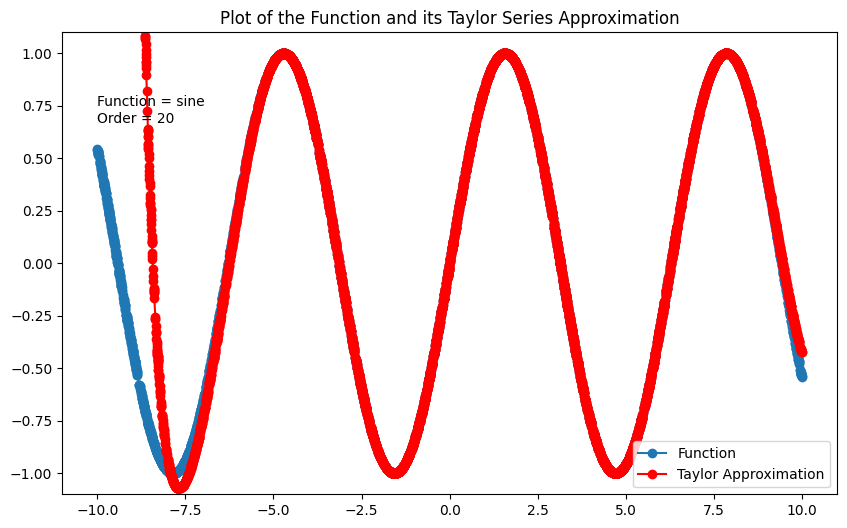

<Figure size 640x480 with 0 Axes>

In [25]:
TaylorSeries = taylor_series()
TaylorSeries.visualize_plots(N = 20, A = 2, func = "sine")

## Linear Regression

In [26]:
from sklearn.linear_model import LinearRegression

In [5]:
def create_polynomials(xs, N = 10):
    xs = xs.reshape(len(xs), 1)
    xs_copy = xs.copy()
    for n in range(2, N + 1):
        xs = np.concatenate([xs, xs_copy**n/math.factorial(n)], axis = 1)
    return xs

In [6]:
def crazy_func(xs):
    return np.sqrt(np.exp(xs/10) * np.cos(xs) + 4)

In [99]:
class linear_approx:
    def __init__(self) -> None:
        self.graph_params = {}
        self.params = {}
        self.xs = None
        self.coefs = None
    
        
    def set_graph_params(self, size = 100000, lower_bound = -10, upper_bound = 10):
        self.graph_params = {
            "size": size,
            "lower_bound": lower_bound,
            "upper_bound": upper_bound
        }
    
    def plot_function(self, N =5, func="exponential"):    
        if func == "exponential":
            function = np.exp
        elif func == "cosine":
            function = np.cos
        elif func == "sine":
            function = np.sin
        else:
            function = func
            
        if not self.graph_params:
            self.set_graph_params()
        
        size = self.graph_params["size"]
        lower_bound = self.graph_params["lower_bound"]
        upper_bound = self.graph_params["upper_bound"]
        
        if self.xs is None:
            self.xs = np.sort(np.random.uniform(low=lower_bound, high=upper_bound, size=size))
            
        y = function(self.xs)
        
        poly_xs= create_polynomials(self.xs, N= N)
        
        model = LinearRegression()
        model.fit(poly_xs, y)
        self.coefs = model.coef_
        predictions = model.predict(poly_xs)
        
        
        plt.figure(figsize=(10, 6))
        plt.plot(self.xs, y, label='Function', marker='o')
        plt.plot(self.xs, predictions, label='Taylor Approximation', marker='o', color='red')
        plt.title("Plot of the Function and its Taylor Series Approximation")
        plt.xlim(lower_bound *1.1, upper_bound *  1.1)
        plt.ylim(np.min(y) - abs(0.1 *np.max(y)), np.max(y) * 1.1)
        plt.text(x = lower_bound, y = np.min(y)+0.2*(np.max(y)-np.min(y)), s = f"Order = {N}")
        if function is str:
            plt.text(x = lower_bound, y = np.min(y), s = f"Function = {func}")
        else:
            plt.text(x = lower_bound, y = np.min(y), s = f"Function = Custom Function")
        plt.legend()
        plt.show()
        
        self.ys = predictions
        
    def visualize_plots(self, N=10, A = 0, func = "exponential"):
        for i in range(N+1):
            self.plot_function(func = func, N = i)
            display(plt.gcf())
            plt.close()
            time.sleep(0.5)
            clear_output(wait=True) 


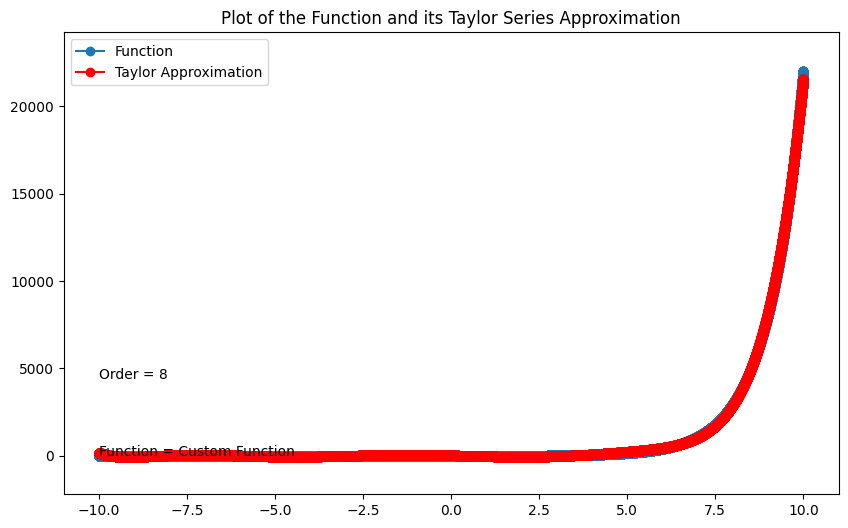

<Figure size 640x480 with 0 Axes>

KeyboardInterrupt: 

In [100]:
LinearApprox = linear_approx()
LinearApprox.visualize_plots(N= 14, func = np.exp)

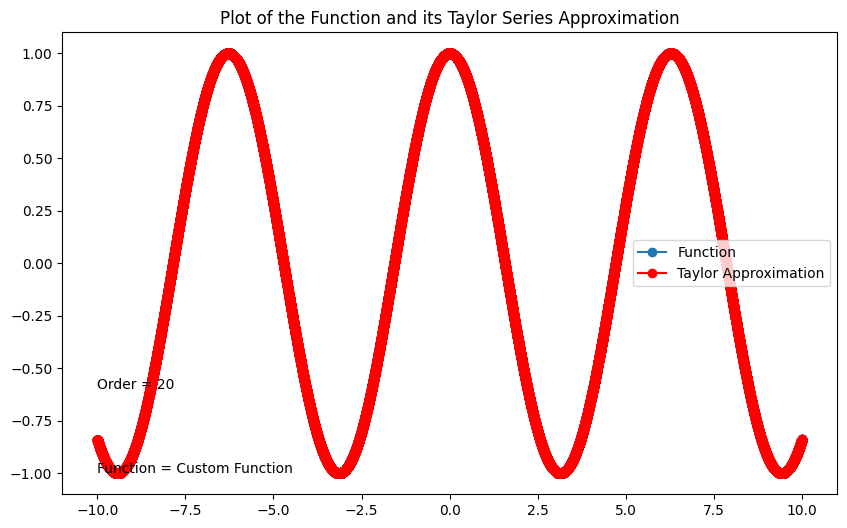

In [110]:
LinearApprox.plot_function(N=20, func = "cosine")

In [113]:
[round(i, 4) for i in LinearApprox.coefs]

[-0.0,
 -1.0,
 0.0,
 1.0,
 -0.0,
 -0.9999,
 0.0,
 0.9994,
 -0.0,
 -0.9972,
 0.0,
 0.9885,
 -0.0,
 -0.9579,
 0.0,
 0.867,
 -0.0,
 -0.6536,
 0.0,
 0.3026]

## Neural Network

In [2]:
from sklearn.preprocessing import StandardScaler

In [3]:
def relu(x):
    return np.maximum(0, x)

def cost(ypred, y):
    m = len(y)
    return(np.sum((ypred - y)**2) / y.shape[1])

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

In [93]:
class FCNN:
    def __init__(self, layer_dims) -> None:
        self.params = {}
        self.params["layers"] = len(layer_dims) - 1
        for l in range(1,len(layer_dims)):
            self.params["W" + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) * np.sqrt(2 / layer_dims[l-1])
            self.params["b" + str(l)] = np.zeros((layer_dims[l],1))
            
    def forward(self, X):
        cache = {}
        
        layers = self.params["layers"]
        A = X.T
        
        for l in range(1, layers + 1):
            Wl = self.params["W" + str(l)]
            bl = self.params["b" + str(l)]
            
            Zl = np.dot(Wl, A) + bl
            if l == layers:
                Al = Zl
            else:
                Al = relu(Zl)
            
            cache["Z" + str(l)] = Zl
            cache["A" + str(l)] = Al
            A = Al
        
        self.cache = cache
        return Al, cache
        
    def backward(self, y, xs):
        layers = self.params["layers"]
        grads = {}
        
        Al = self.cache["A" + str(layers)]  # (1 x 1000)
        dAl = -2 * (y - Al)
        dZl = dAl 
        
        grads["dW" + str(layers)] = np.dot(dZl, self.cache["A" + str(layers - 1)].T) / y.shape[0] # (1, 10)
        grads["db" + str(layers)] = np.mean(dZl, axis=1, keepdims=True)
        
        for l in range(layers - 1, 0, -1):
            dAl = np.dot(self.params["W" + str(l + 1)].T, dZl)
            dZl = dAl * relu_derivative(self.cache["Z" + str(l)])
            
            grads["dW" + str(l)] = np.dot(dZl, self.cache["A" + str(l - 1)].T if l != 1 else xs) / y.shape[0]
            grads["db" + str(l)] = np.mean(dZl, axis=1, keepdims=True)
        
        self.grads = grads


    def teach_weights(self, lr, beta=0.9):
        layers = self.params["layers"]
        for l in range(1, layers + 1):
            if "Vdw" + str(l) not in self.params:
                self.params["Vdw" + str(l)] = np.zeros_like(self.params["W" + str(l)])
                self.params["Vdb" + str(l)] = np.zeros_like(self.params["b" + str(l)])
            
            # Update momentum
            self.params["Vdw" + str(l)] = beta * self.params["Vdw" + str(l)] + (1 - beta) * self.grads["dW" + str(l)]
            self.params["Vdb" + str(l)] = beta * self.params["Vdb" + str(l)] + (1 - beta) * self.grads["db" + str(l)]
            
            # Update weights and biases
            self.params["W" + str(l)] -= lr * self.params["Vdw" + str(l)]
            self.params["b" + str(l)] -= lr * self.params["Vdb" + str(l)]

In [101]:
fcnn_approx = FCNN_approx()
fcnn_approx.initialize(N = 10, func = "exponential")
fcnn_approx.train([10,10,10,1], initial_lr=0.001, epochs = 1000)

  0%|          | 0/1000 [00:00<?, ?it/s]/var/folders/pl/z72m_lzx4_d8qgb1jjgg6tgc0000gn/T/ipykernel_48076/992883187.py:6: RuntimeWarning: overflow encountered in square
  return(np.sum((ypred - y)**2) / y.shape[1])
/var/folders/pl/z72m_lzx4_d8qgb1jjgg6tgc0000gn/T/ipykernel_48076/2886174791.py:45: RuntimeWarning: invalid value encountered in multiply
  dZl = dAl * relu_derivative(self.cache["Z" + str(l)])
100%|██████████| 1000/1000 [00:23<00:00, 42.24it/s]

Loss after Epoch 1000: nan


(array([[nan, nan, nan, ..., nan, nan, nan]]), None)

In [95]:
class FCNN_approx:
    def __init__(self) -> None:
        self.graph_params = {}
        self.params = {}
        self.xs = None
        self.ys = None
        self.model = None
        
    def set_params(self, N = 5, A = 0):
        self.params["N"] = N
        self.params["A"] = A
        return
    
    def set_graph_params(self, size = 5000, lower_bound = -10, upper_bound = 10):
        self.graph_params = {
            "size": size,
            "lower_bound": lower_bound,
            "upper_bound": upper_bound
        }
    
    def generate_data(self, func = "exponential"):
        if func == "exponential":
            function = np.exp
        elif func == "cosine":
            function = np.cos
        elif func == "sine":
            function = np.sin
        else:
            function = func
            
        size = self.graph_params["size"]
        lower_bound = self.graph_params["lower_bound"]
        upper_bound = self.graph_params["upper_bound"]
        
        xs = np.sort(np.random.uniform(low=lower_bound, high=upper_bound, size=size)) 
        self.xs = create_polynomials(xs, N= self.params["N"])
        self.ys = function(xs)
        
    def initialize(self, N, func):
        self.set_params(N = N)
        self.set_graph_params()
        self.generate_data(func = func)
        
    def train(self, layer_dims, initial_lr, epochs = 10, decay_rate=0.8, decay_steps=100):
        assert layer_dims[0] == self.params["N"], f'First dimension must have {self.params["N"]} inputs'
        assert layer_dims[-1] == 1, f'First dimension must have output 1'
        
        if self.model is None:
            self.model = FCNN(layer_dims = layer_dims)
        
        for e in tqdm(range(1, epochs+1)):
            Al, cache = self.model.forward(self.xs)
            current_cost = cost(self.ys, Al)
            if e%1000 == 0:
                print(f"Loss after Epoch {e}: {current_cost}")
                
            self.model.backward(self.ys, self.xs)
            lr = initial_lr * (decay_rate ** (e / decay_steps))
            params = self.model.teach_weights(lr = lr)
        
        return Al, params
        

(1, 5000)


ValueError: shapes (10,5000) and (10,5000) not aligned: 5000 (dim 1) != 10 (dim 0)

In [226]:
def initialize_weights(layer_dims):
    params = {}
    params["layers"] = len(layer_dims) - 1
    for l in range(1,len(layer_dims)):
        params["W" + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) * np.sqrt(2 / layer_dims[l-1])
        params["b" + str(l)] = np.zeros((layer_dims[l],1))
    return params 

def forward_propagation(X, params):
    cache = {}
    
    layers = params["layers"]
    W1 = params["W1"]
    b1 = params["b1"]
    
    Zl = np.dot(W1, X.T) + b1
    Al = np.tanh(Zl)
    
    cache["Z1"] = Zl
    cache["A1"] = Al
    
    for l in range(2, layers+1):
        Wl = params["W" + str(l)]
        bl = params["b" + str(l)]
        
        Zl = np.dot(Wl, Al) + bl
        if l == layers:
            Al=Zl
        else:
            Al = relu(Zl)
        
        cache["Z" + str(l)] = Zl
        cache["A" + str(l)] = Al
        
    return Al, cache

def back_propagation(cache, params, y, xs):
    layers = params["layers"]
    grads = {}
    

    Al = cache["A" + str(layers)]
    dAl = -2 * (y - Al) 
    dZl = dAl * relu_derivative(cache["Z" + str(layers)])
    grads["dW" + str(layers)] = np.dot(dZl, cache["A" + str(layers-1)].T) / y.shape[0]
    grads["db" + str(layers)] = np.mean(dZl.T, axis=0)
    
    for l in range(layers - 1, 0, -1):
        dAl = np.dot(dZl.T, params["W" + str(l + 1)])
        dZl = dAl.T * relu_derivative(cache["Z" + str(l)])

        grads["dW" + str(l)] = np.dot(dZl, cache["A" + str(l-1)].T if l > 1 else xs ) / y.shape[0]
        grads["db" + str(l)] = np.mean(dZl.T, axis=0)
        
    return grads

def teach_weights(lr, grads, params, beta=0.9):
    layers = params["layers"]
    for l in range(1, layers + 1):  # make sure to include the last layer
        # Initialize momentum for weights and biases if not already done
        if "Vdw" + str(l) not in params:
            params["Vdw" + str(l)] = np.zeros_like(params["W" + str(l)])
            params["Vdb" + str(l)] = np.zeros_like(params["b" + str(l)])
        
        # Update momentum
        params["Vdw" + str(l)] = beta * params["Vdw" + str(l)] + (1 - beta) * grads["dW" + str(l)]
        params["Vdb" + str(l)] = beta * params["Vdb" + str(l)] + (1 - beta) * grads["db" + str(l)].reshape(-1,1)
        
        # Update weights and biases
        params["W" + str(l)] -= lr * params["Vdw" + str(l)]
        params["b" + str(l)] -= lr * params["Vdb" + str(l)]
    
    return params


def FCNN(xs, y, layer_dims, initial_lr, epochs = 10, decay_rate=0.8, decay_steps=100):
    params = initialize_weights(layer_dims=layer_dims)
    for e in range(1, epochs+1):
        Al, cache = forward_propagation(xs, params = params)
        current_cost = cost(y, Al)
        if e%1000 == 0:
            print(f"Loss after Epoch {e}: {current_cost}")
        
        grads = back_propagation(cache, params, y, xs)
        lr = initial_lr * (decay_rate ** (e / decay_steps))
        params = teach_weights(lr = lr, grads = grads, params = params)
    
    return Al, params

In [227]:
xs = create_polynomials(TaylorSeries.xs, N= 10)
y = np.exp(TaylorSeries.xs)

In [228]:
scaler = StandardScaler()
xs = scaler.fit_transform(xs)

In [229]:
preds, params = FCNN(xs = xs, y = np.exp(TaylorSeries.xs), layer_dims = [5,10,10,1], initial_lr = 0.01, epochs = 10000, decay_rate= 1, decay_steps=2000)

ValueError: shapes (10,5) and (10,5000) not aligned: 5 (dim 1) != 10 (dim 0)

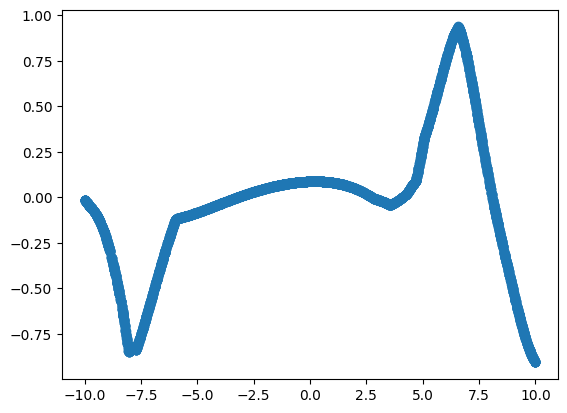

In [224]:
plt.scatter(y = preds,x = TaylorSeries.xs, alpha = 1)
#plt.scatter(y = np.exp(TaylorSeries.xs), x = TaylorSeries.xs, alpha =0.1)
plt.show()


## With PyTorch

In [24]:
import torch
import torch.nn as nn
import torch.optim as optim

In [25]:
class FCN(nn.Module):
    def __init__(self):
        super(FCN, self).__init__()
        self.fc1 = nn.Linear(5, 5) 
        self.fc2 = nn.Linear(5, 5) 
        self.fc3 = nn.Linear(5, 1)
        # Activation function
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x) 
        return x

model = FCN()

tensor([[-0.0297]], grad_fn=<AddmmBackward0>)


In [53]:
inputs = torch.from_numpy(xs).float()
targets = torch.from_numpy(np.cos(TaylorSeries.xs)).float()

In [54]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# Training loop
num_epochs = 100

for epoch in range(num_epochs):
    total_loss = 0
    for i in range(inputs.size(0)):
        # Forward pass: Compute predicted y by passing x to the model
        outputs = model(inputs[i].unsqueeze(0))  # Ensure input tensor is correctly shaped

        # Compute and print loss
        loss = criterion(outputs, targets[i].unsqueeze(0)) 
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    # Print statistics
    average_loss = total_loss / inputs.size(0)
    print(f'Epoch [{epoch+1}/{num_epochs}], Average Loss: {average_loss:.4f}')



# Final model output check on the last input
final_pred = model(inputs)
print("Example of final prediction:", final_pred)

/Users/joshuachen/anaconda3/envs/uni/lib/python3.11/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/100], Average Loss: 7171036.1302
Epoch [2/100], Average Loss: 5629904.0242
Epoch [3/100], Average Loss: 4032761.4296
Epoch [4/100], Average Loss: 2833854.9750
Epoch [5/100], Average Loss: 1948713.5389
Epoch [6/100], Average Loss: 1314624.0426
Epoch [7/100], Average Loss: 885024.0128
Epoch [8/100], Average Loss: 606660.9998
Epoch [9/100], Average Loss: 429080.1879
Epoch [10/100], Average Loss: 315090.4180
Epoch [11/100], Average Loss: 238369.3674
Epoch [12/100], Average Loss: 183020.1493
Epoch [13/100], Average Loss: 138973.2081
Epoch [14/100], Average Loss: 103262.8829
Epoch [15/100], Average Loss: 74423.6529
Epoch [16/100], Average Loss: 51306.5518
Epoch [17/100], Average Loss: 34258.6650
Epoch [18/100], Average Loss: 22089.7262
Epoch [19/100], Average Loss: 13745.9820
Epoch [20/100], Average Loss: 7983.8704
Epoch [21/100], Average Loss: 4686.9328
Epoch [22/100], Average Loss: 2846.6986
Epoch [23/100], Average Loss: 1814.5627
Epoch [24/100], Average Loss: 1102.7175
Epoch [25/

In [55]:
final_pred = model(inputs)

In [56]:
xs.shape

(5000, 5)

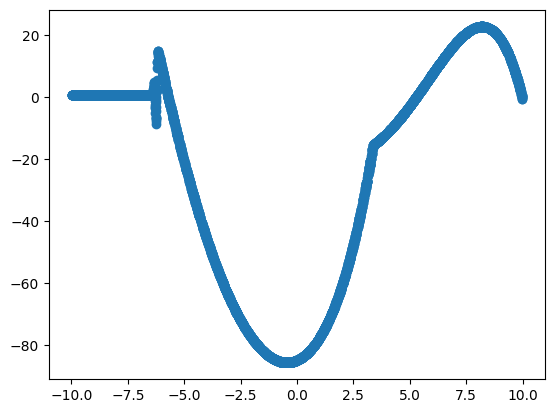

In [57]:
plt.scatter(x = TaylorSeries.xs, y = final_pred.detach().numpy())